In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Download the Austin Rainfall dataset that is under DataSets on BB. 
# We will use this dataset to predict rainfall amounts.

# 2. See what you can discover about the data! (how many rows/columns? Any missing values? 
# Any string values in columns that should really be numeric? 
# (For example, a T in the rainfall column means a trace of rain that is not measurable, it can be changed to 0.0)

# 3. EDA: Are any features correlated to the rainfall? 
# You don't have to check all, choose what you think makes sense and plot to check!

In [3]:
df = pd.read_csv('austin_weather (1).csv')

In [4]:
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [6]:
cols = df.columns[4:-1]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1319 non-null   object 
 1   TempHighF                   1319 non-null   int64  
 2   TempAvgF                    1319 non-null   int64  
 3   TempLowF                    1319 non-null   int64  
 4   DewPointHighF               1312 non-null   float64
 5   DewPointAvgF                1312 non-null   float64
 6   DewPointLowF                1312 non-null   float64
 7   HumidityHighPercent         1317 non-null   float64
 8   HumidityAvgPercent          1317 non-null   float64
 9   HumidityLowPercent          1317 non-null   float64
 10  SeaLevelPressureHighInches  1316 non-null   float64
 11  SeaLevelPressureAvgInches   1316 non-null   float64
 12  SeaLevelPressureLowInches   1316 non-null   float64
 13  VisibilityHighMiles         1307 

In [8]:
df['Date'] = df['Date'].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        1319 non-null   datetime64[ns]
 1   TempHighF                   1319 non-null   int64         
 2   TempAvgF                    1319 non-null   int64         
 3   TempLowF                    1319 non-null   int64         
 4   DewPointHighF               1312 non-null   float64       
 5   DewPointAvgF                1312 non-null   float64       
 6   DewPointLowF                1312 non-null   float64       
 7   HumidityHighPercent         1317 non-null   float64       
 8   HumidityAvgPercent          1317 non-null   float64       
 9   HumidityLowPercent          1317 non-null   float64       
 10  SeaLevelPressureHighInches  1316 non-null   float64       
 11  SeaLevelPressureAvgInches   1316 non-null   float64     

In [9]:
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,...,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,...,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,0.00,
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,...,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,0.00,
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,...,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,0.00,
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,...,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,NaN,


In [10]:
df.fillna(0)

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,...,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,...,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,0.00,
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,...,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,0.00,
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,...,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,0.00,
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,...,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,0.00,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71.0,67.0,61.0,82.0,54.0,25.0,...,29.97,29.88,10.0,10.0,10.0,12.0,5.0,21.0,0.00,
1315,2017-07-28,105,91,76,71.0,64.0,55.0,87.0,54.0,20.0,...,29.90,29.81,10.0,10.0,10.0,14.0,5.0,20.0,0.00,
1316,2017-07-29,107,92,77,72.0,64.0,55.0,82.0,51.0,19.0,...,29.86,29.79,10.0,10.0,10.0,12.0,4.0,17.0,0.00,
1317,2017-07-30,106,93,79,70.0,68.0,63.0,69.0,48.0,27.0,...,29.91,29.87,10.0,10.0,10.0,13.0,4.0,20.0,0.00,


Text(0, 0.5, 'Precipitation Sum Inches')

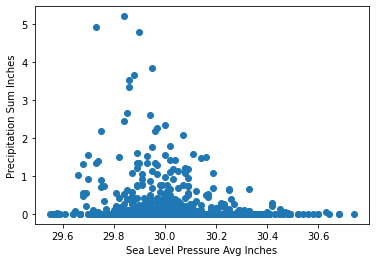

In [14]:
plt.scatter(df['SeaLevelPressureAvgInches'], df['PrecipitationSumInches'])
plt.xlabel('Sea Level Pressure Avg Inches')
plt.ylabel('Precipitation Sum Inches')

Text(0, 0.5, 'Precipitation Sum Inches')

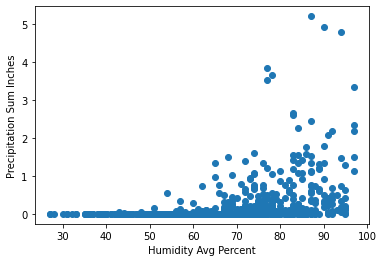

In [16]:
plt.scatter(df['HumidityAvgPercent'], df['PrecipitationSumInches'])
plt.xlabel('Humidity Avg Percent')
plt.ylabel('Precipitation Sum Inches')

Text(0, 0.5, 'Humidity Avg Percent')

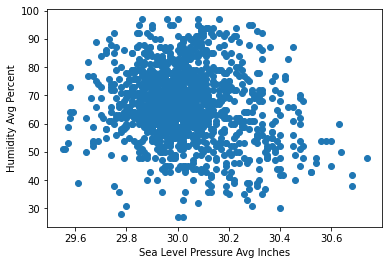

In [23]:
plt.scatter(df['SeaLevelPressureAvgInches'], df['HumidityAvgPercent'])
plt.xlabel('Sea Level Pressure Avg Inches')
plt.ylabel('Humidity Avg Percent')

Text(0, 0.5, 'Humidity Avg Percent')

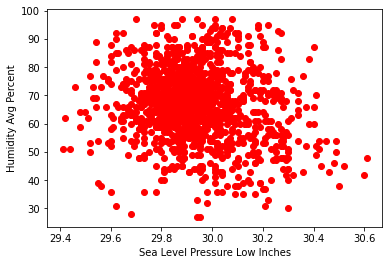

In [25]:
plt.scatter(df['SeaLevelPressureLowInches'], df['HumidityAvgPercent'], color = 'red')
plt.xlabel('Sea Level Pressure Low Inches')
plt.ylabel('Humidity Avg Percent')